# Reconnaissance de lettres - Création de modèle

## Import des modules & données

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.utils import *
from keras import Sequential
from keras.layers import *
from keras.models import *
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt 

In [2]:
training_letter = pd.read_csv('data/emnist-letters-train.csv', header=None, prefix="col_")
training_letter.rename(columns = {'col_0':'label'}, inplace = True)

testing_letter = pd.read_csv('data/emnist-letters-test.csv', header=None, prefix="col_")
testing_letter.rename(columns = {'col_0':'label'}, inplace = True)

print(training_letter.shape)
training_letter.head()

(88800, 785)


,label,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_775,col_776,col_777,col_778,col_779,col_780,col_781,col_782,col_783,col_784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(testing_letter.shape)
testing_letter.head()

(14800, 785)


,label,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_775,col_776,col_777,col_778,col_779,col_780,col_781,col_782,col_783,col_784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Les datasets contiennent les données déjà vectorisées.
<br> 1 ligne = 784 pixels (28*28)

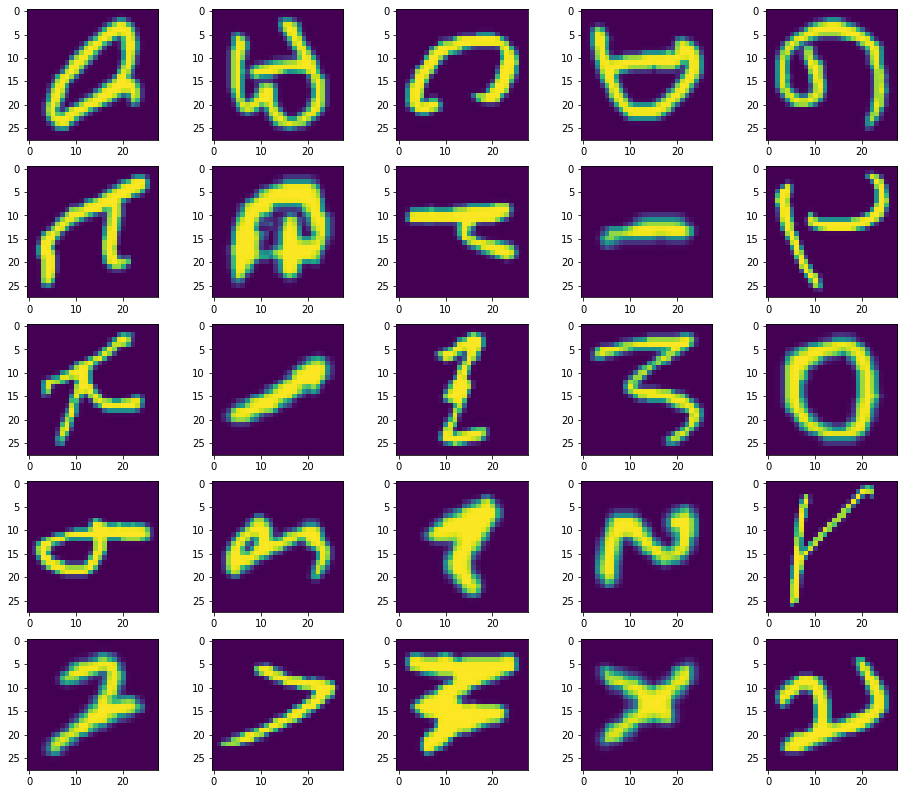

In [4]:
df_unique = training_letter.groupby('label').first()

xx = np.array(df_unique.values)

fig,axes = plt.subplots(5,5,figsize=(16,14))
for i,ax in enumerate(axes.flat):
    ax.imshow(xx[i].reshape([28,28]))

Les lettres sont pivotées à 90° vers la droite et retournées.
<br>Un dictionnaire est créé pour attribuer les lettres aux labels (ici l'index = l'ordre des lettres dans l'alphabet)

In [5]:
dictionnaire = dict({0:"???",
                     1:"a",
                     2:"b",
                     3:"c",
                     4:"d",
                    5:"e",
                    6:"f",
                    7:"g",
                    8:"h",
                    9:"i",
                    10:"j",
                    11:"k",
                    12:"l",
                    13:"m",
                    14:"n",
                    15:"o",
                    16:"p",
                    17:"q",
                    18:"r",
                    19:"s",
                    20:"t",
                    21:"u",
                    22:"v",
                    23:"w",
                    24:"x",
                    25:"y",
                    26:"z"})

training_letter.label.unique()

array([23,  7, 16, 15, 17, 13, 11, 22, 24, 10, 14, 18, 21, 26, 19,  5,  2,
       25,  9, 12,  1,  8,  4,  3, 20,  6], dtype=int64)

## Exploration

In [6]:
print(len(training_letter["label"].unique()))
training_letter["label"].value_counts()

26


25    3453
11    3438
5     3437
24    3437
20    3436
17    3435
16    3430
9     3428
26    3427
8     3424
23    3423
22    3422
18    3419
21    3419
3     3419
12    3415
15    3408
10    3402
13    3402
4     3398
2     3396
1     3396
6     3394
19    3392
7     3385
14    3365
Name: label, dtype: int64

In [7]:
print(len(testing_letter["label"].unique()))
testing_letter["label"].value_counts()

19


1     800
11    800
18    800
17    800
16    800
15    800
14    800
13    800
12    800
10    800
2     800
9     800
8     800
7     800
6     800
5     800
4     800
3     800
19    400
Name: label, dtype: int64

In [8]:
training_letter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88800 entries, 0 to 88799
Columns: 785 entries, label to col_784
dtypes: int64(785)
memory usage: 531.8 MB


In [9]:
testing_letter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Columns: 785 entries, label to col_784
dtypes: int64(785)
memory usage: 88.6 MB


Le nombre de lettres est équilibré dans les datasets

## Pre processing

(88800,)
(88800, 784)


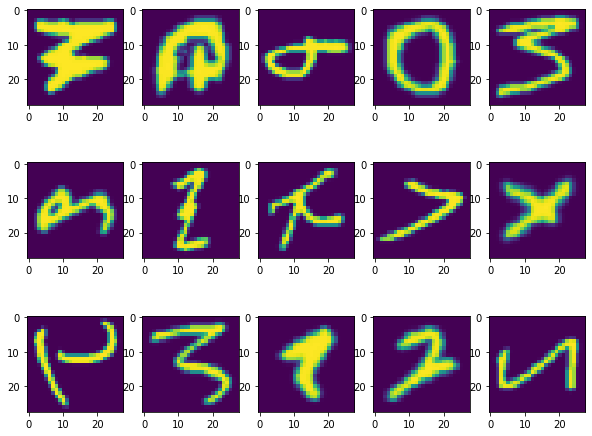

In [10]:
#training
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

In [11]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

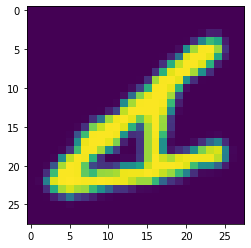

In [12]:
plt.imshow(test_images[1].reshape([28,28]))

In [13]:
number_of_classes = len(training_letter["label"].unique())+1

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

#données de test
test_x = test_images
test_y = y2

## Modélisation

### Modèle 1

In [14]:
MCP = ModelCheckpoint('Best_points_2.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=1,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

train_x, val_x, train_y, val_y = train_test_split(train_images, y1, test_size=0.2, random_state=42)

model = Sequential([Conv2D(32,3,input_shape=(28,28,1)),
                            MaxPooling2D(2,2),
                            Flatten(input_shape=(28,28,1)),
                            Dense(512,activation='relu'),
                            Dense(128,activation='relu'),
                            Dense(number_of_classes,activation='softmax')])

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 27)                3483      
                                                        

In [15]:
history = model.fit(train_x,train_y,epochs=2,batch_size=128,validation_data=(val_x,val_y), verbose=1,callbacks=[MCP,ES,RLP])

Epoch 1/2
553/555 [============================>.] - ETA: 0s - loss: 0.6584 - accuracy: 0.7972
Epoch 1: val_accuracy improved from -inf to 0.88446, saving model to Best_points_2.h5
555/555 [==============================] - 16s 29ms/step - loss: 0.6571 - accuracy: 0.7975 - val_loss: 0.3568 - val_accuracy: 0.8845 - lr: 0.0010
Epoch 2/2
554/555 [============================>.] - ETA: 0s - loss: 0.2968 - accuracy: 0.9021
Epoch 2: val_accuracy improved from 0.88446 to 0.89758, saving model to Best_points_2.h5
555/555 [==============================] - 16s 29ms/step - loss: 0.2970 - accuracy: 0.9020 - val_loss: 0.3199 - val_accuracy: 0.8976 - lr: 0.0010


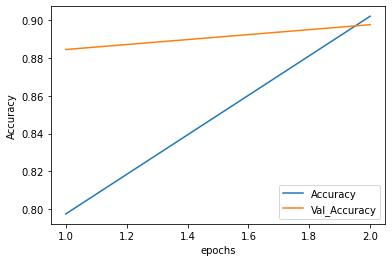

In [32]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

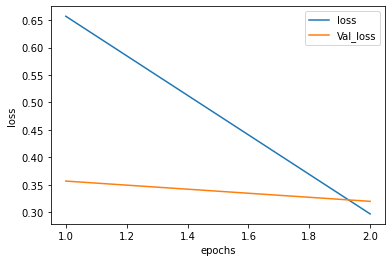

In [31]:
q = len(history.history['loss'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['loss'], label='loss')
sns.lineplot(x = range(1,1+q),y = history.history['val_loss'], label='Val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [18]:
predictions = model.predict(test_x).round()
predictions

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
print(classification_report(test_y, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.89      0.86      0.87       800
           2       0.96      0.90      0.93       800
           3       0.95      0.94      0.94       800
           4       0.95      0.86      0.91       800
           5       0.96      0.92      0.94       800
           6       1.00      0.88      0.94       800
           7       0.87      0.71      0.78       800
           8       0.89      0.90      0.90       800
           9       0.76      0.67      0.71       800
          10       0.97      0.90      0.93       800
          11       0.98      0.92      0.95       800
          12       0.74      0.69      0.71       800
          13       0.95      0.97      0.96       800
          14       0.93      0.92      0.92       800
          15       0.92      0.96      0.94       800
          16       0.95      0.96      0.95       800
          17       0.79    

### Modèle 2

In [20]:
model2 = Sequential([Conv2D(32,3,input_shape=(28,28,1)),
                            MaxPooling2D(2,2),
                            Flatten(input_shape=(28,28,1)),
                            Dense(256,activation='relu'),
                            Dense(128,activation='relu'),
                            Dense(number_of_classes,activation='softmax')])

model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               1384704   
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 27)                3483      
                                                      

In [21]:
history1 = model2.fit(train_x,train_y,epochs=2,batch_size=136,validation_data=(val_x,val_y))

Epoch 1/2
523/523 [==============================] - 11s 21ms/step - loss: 0.7278 - accuracy: 0.7776 - val_loss: 0.4580 - val_accuracy: 0.8521
Epoch 2/2
523/523 [==============================] - 11s 21ms/step - loss: 0.3349 - accuracy: 0.8900 - val_loss: 0.3331 - val_accuracy: 0.8919


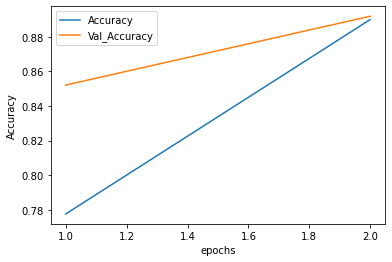

In [29]:
q = len(history1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

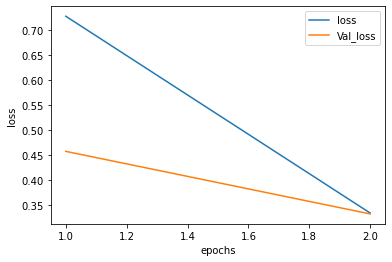

In [30]:
q = len(history1.history['loss'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['loss'], label='loss')
sns.lineplot(x = range(1,1+q),y = history1.history['val_loss'], label='Val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [24]:
predictions2 = model2.predict(test_x)
predictions2 = predictions2.round()
predictions2

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
print(classification_report(test_y, predictions2, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.92      0.83      0.87       800
           2       0.96      0.89      0.93       800
           3       0.93      0.92      0.93       800
           4       0.87      0.93      0.90       800
           5       0.89      0.94      0.92       800
           6       0.91      0.92      0.92       800
           7       0.87      0.69      0.77       800
           8       0.96      0.84      0.89       800
           9       0.72      0.74      0.73       800
          10       0.96      0.86      0.91       800
          11       0.97      0.89      0.93       800
          12       0.79      0.60      0.69       800
          13       0.96      0.96      0.96       800
          14       0.95      0.87      0.91       800
          15       0.98      0.91      0.94       800
          16       0.96      0.93      0.94       800
          17       0.81    

### Modèle 3
Chargement d'un autre modèle gracieusement cédé par un collègue qui l'a testé et compilé pendant quelques heures sur sa machine

In [26]:
model_ld = load_model('fat_model.hdf5')
model_ld.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_77 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 5, 5, 32)        

Soit :

```
model = Sequential([Conv2D(32,3,input_shape=(28,28,1)),
                            MaxPooling2D(2,2),
                            Dropout(0.25),
                            Conv2D(32,3),
                            MaxPooling2D(2,2),
                            Dropout(0.25),
                            Flatten(input_shape=(28,28,1)),
                            Dense(512,activation='relu'),
                            Dropout(0.25),
                            Dense(128,activation='relu'),
                            Dropout(0.25),
                            Dense(number_of_classes,activation='softmax')])


model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])}
```

In [27]:
predictions3 = model_ld.predict(test_x)
predictions3 = predictions3.round()
print(classification_report(test_y, predictions3, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.93      0.91      0.92       800
           2       0.98      0.94      0.96       800
           3       0.95      0.96      0.96       800
           4       0.97      0.92      0.94       800
           5       0.97      0.95      0.96       800
           6       0.99      0.93      0.96       800
           7       0.88      0.77      0.82       800
           8       0.94      0.94      0.94       800
           9       0.74      0.80      0.77       800
          10       0.98      0.92      0.95       800
          11       0.99      0.94      0.97       800
          12       0.76      0.75      0.76       800
          13       0.99      0.96      0.98       800
          14       0.95      0.95      0.95       800
          15       0.93      0.98      0.96       800
          16       0.98      0.96      0.97       800
          17       0.88    

### Comparaison entre les modèles
A noter : la moyenne macro est plus basse sur tous les modèles car les données de test ne contiennent que 19 labels

- [ ] Modèle 1 (moyen)
```
     micro avg       0.91      0.88      0.89     14800
     macro avg       0.64      0.62      0.63     14800
weighted avg       0.91      0.88      0.89     14800
   samples avg       0.88      0.88      0.88     14800
```
- [ ] Modèle 2 (moins bon)
```
     micro avg       0.90      0.86      0.88     14800
     macro avg       0.64      0.60      0.62     14800
weighted avg       0.91      0.86      0.88     14800
   samples avg       0.86      0.86      0.86     14800
```
- [x] Modèle 3 (meilleur)
```
     micro avg       0.93      0.91      0.92     14800
     macro avg       0.66      0.64      0.65     14800
weighted avg       0.93      0.91      0.92     14800
   samples avg       0.91      0.91      0.91     14800
```

Ce dernier modèle est donc sélectionné.
<br>Il a été corrigé en une nouvelle version (fat_model_corrected.hdf5) de telle manière qu'il prend désormais en compte uniquement les images placées dans le bon sens, dans le but de l'utiliser dans une application de reconnaissance de lettres.